## 激活函数

### 跃阶函数

$$h(x)=\left\{\begin{array}{ll}{0} & {(x \leqslant 0)} \\ {1} & {(x>0)}\end{array}\right.$$

In [1]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

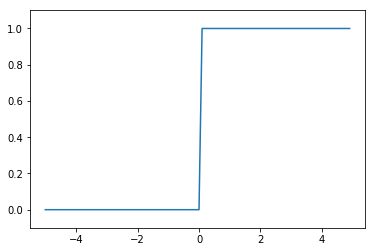

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### sigmoid函数

$$h(x)=\frac{1}{1+\exp (-x)}$$

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

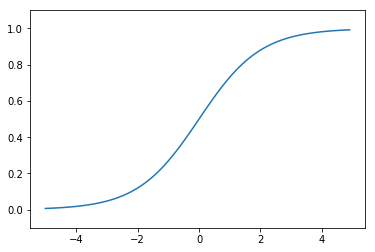

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU函数 Rectified Linear Unit

ReLU函数在输入大于0 时，直接输出该值；在输入小于等于0 时，输出0

$$h(x)=\left\{\begin{array}{ll}{x} & {(x>0)} \\ {0} & {(x \leqslant 0)}\end{array}\right.$$

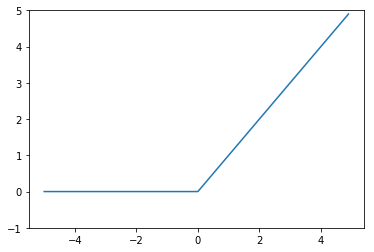

In [12]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5)
plt.show()

## 多维数组的运算

In [15]:
import numpy as np

## 一维数组
A = np.array([1, 2, 3, 4])
A

array([1, 2, 3, 4])

In [19]:
print(A.shape)
print(A.ndim)

(4,)
1


In [20]:
## 二维数组
B = np.array([[1, 2], [3, 4], [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
print(B.shape)
print(B.ndim)

(3, 2)
2


### 矩阵乘法

In [22]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
# 2X3 . 3X2
np.dot(A, B)

array([[22, 28],
       [49, 64]])

## 三层神经网络的实现

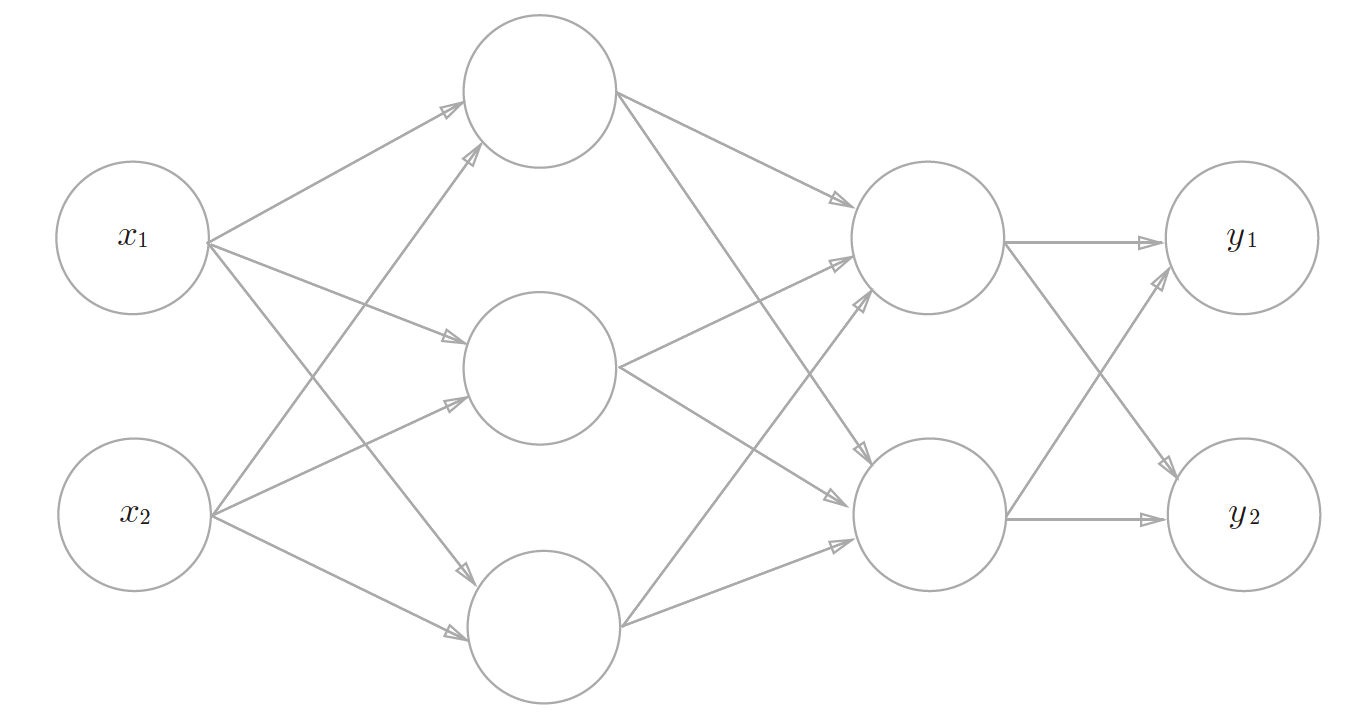

### 从输入层到第一层的信号传递

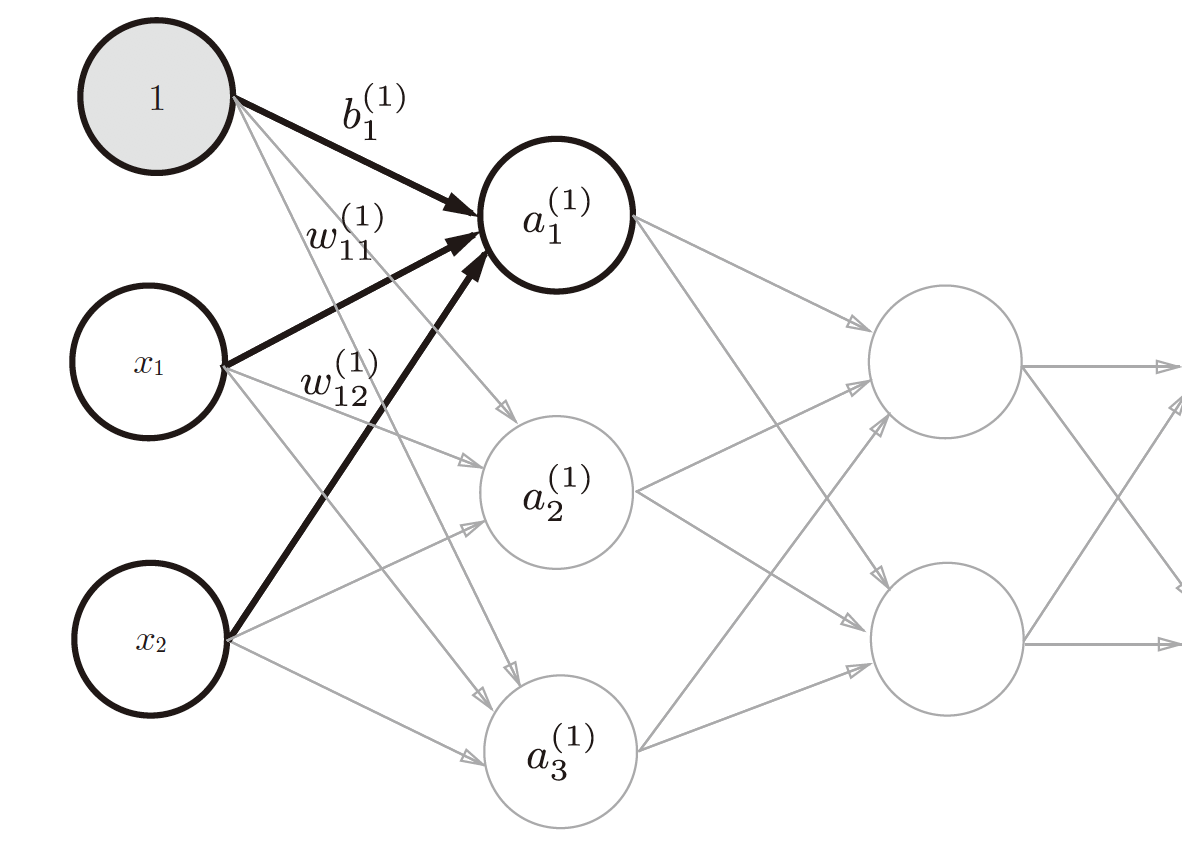

$a_{1}^{(1)}=w_{11}^{(1)} x_{1}+w_{12}^{(1)} x_{2}+b_{1}^{(1)}$

使用矩阵的乘法运算，可以把第一层的加权和写成如下的形式：

$$\boldsymbol{A}^{(1)}=\boldsymbol{X} \boldsymbol{W}^{(1)}+\boldsymbol{B}^{(1)}$$

其中，$\boldsymbol{A}^{(1)}$、$\boldsymbol{X}$、$\boldsymbol{B}^{(1)}$、$\boldsymbol{W}^{(1)}$ 如下所示

$\boldsymbol{A}^{(1)}=\left( \begin{array}{ccc}{a_{1}^{(1)}} & {a_{2}^{(1)}} & {a_{3}^{(1)}}\end{array}\right)$, $\boldsymbol{X}=\left( \begin{array}{ll}{x_{1}} & {x_{2}}\end{array}\right)$, $\boldsymbol{B}^{(1)}=\left( \begin{array}{lll}{b_{1}^{(1)}} & {b_{2}^{(1)}} & {b_{3}^{(1)}}\end{array}\right)$, $\boldsymbol{W}^{(1)}=\left( \begin{array}{ccc}{w_{11}^{(1)}} & {w_{21}^{(1)}} & {w_{31}^{(1)}} \\ {w_{12}^{(1)}} & {w_{22}^{(1)}} & {w_{32}^{(1)}}\end{array}\right)$

In [24]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [25]:
A1 = np.dot(X, W1) + B1
## activation function
Z1 = sigmoid(A1)

In [26]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 从第一层到第二层的信号传递

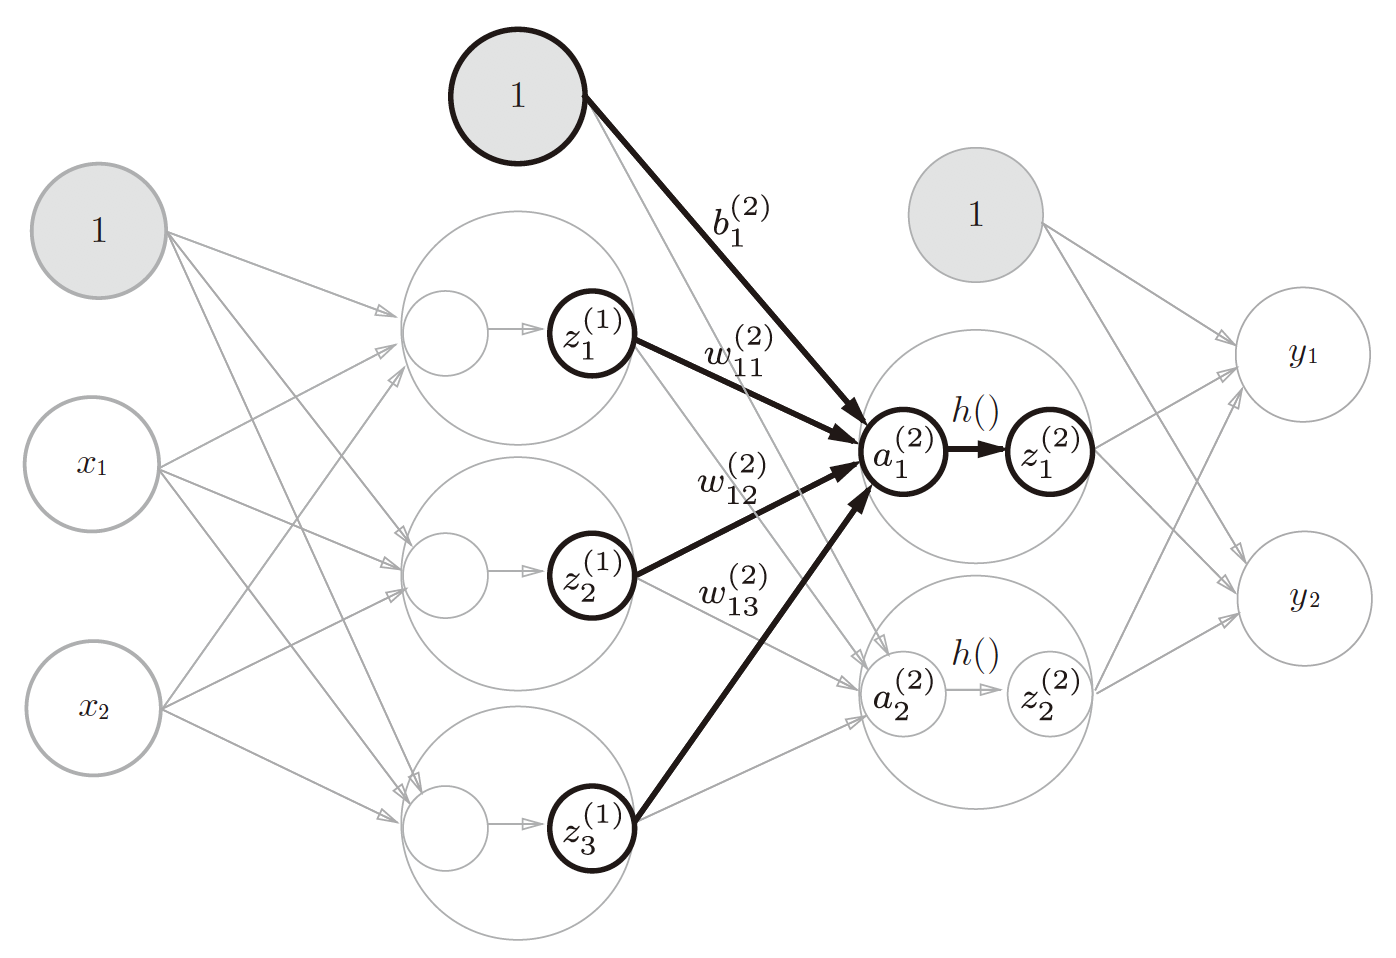

In [27]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [28]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 第二层到输出层

In [29]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # Y=A3

输出层所用的激活函数，要根据求解问题的性质决定。一般地，回归问题可以使用恒等函数，二元分类问题可以使用sigmoid 函数，多元分类问题可以使用softmax 函数

## 整合起来

In [30]:
def init_network():
    ## 权重和偏置的初始化
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    ## 将输入信号向前传播，转换为输出信号
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    Y = identity_function(a3)
    
    return Y

In [31]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax 函数

### softmax函数

分类问题中使用的softmax 函数可以用下面的式表示：

$$y_{k}=\frac{\exp \left(a_{k}\right)}{\sum_{i=1}^{n} \exp \left(a_{i}\right)}$$

In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

__注意：__ softmax 函数的实现中要进行指数函数的运算，但是此时指数函数的值很容易变得非常大。比如，e10 的值会超过20000，e100 会变成一个后面有40 多个0 的超大值，e1000 的结果会返回一个表示无穷大的inf。如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。

所以可以将softmax函数该进如下：

$$y_{k}=\frac{\exp \left(a_{k}\right)}{\sum_{i=1}^{n} \exp \left(a_{i}\right)}=\frac{\operatorname{Cexp}\left(a_{k}\right)}{\mathrm{C} \sum_{i=1}^{n} \exp \left(a_{i}\right)}=\frac{\exp \left(a_{k}+\log \mathrm{C}\right)}{\sum_{i=1}^{n} \exp \left(a_{i}+\log \mathrm{C}\right)}=\frac{\exp \left(a_{k}+\mathrm{C}^{\prime}\right)}{\sum_{i=1}^{n} \exp \left(a_{i}+\mathrm{C}^{\prime}\right)}$$

这里的 $\mathrm{C}^{\prime}$ 可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值

In [33]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [35]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## MNIST数字识别

下载MNIST数据集

In [39]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


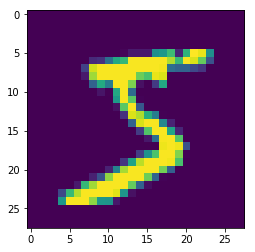

In [42]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    imshow(pil_img)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 把图像形状变成原来的尺寸
print(img.shape)
img_show(img)

__flatten=True时读入的图像是以一列（一维）NumPy数组的形式保存的__

In [46]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [47]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [43]:
%pwd

'/Users/lvshuo/Desktop/hands_on/ml_onhands/intro_DeepLearning'